# Replicating the model from a research paper

----

Link to the research paper is : [https://www.semanticscholar.org/paper/Deep-Learning-Based-Vehicle-Classification-for-Low-Tas-Sari/52b6e6a8e89e236581b8a92f38bf77845fc3b8f9](https://www.semanticscholar.org/paper/Deep-Learning-Based-Vehicle-Classification-for-Low-Tas-Sari/52b6e6a8e89e236581b8a92f38bf77845fc3b8f9)

> The model proposed by the authors of the paper will be replicated below.

### Importing the libraries

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

### Setting batch and image size, and importing the datasets 

In [11]:
# Batch and image size
IMAGE_SIZE = 100
BATCH_SIZE = 32

# Getting the train, validation and test data
train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

# Caching the datasets to load faster
train = train.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val = val.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test = test.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


### Model that replicates the paper

In [12]:
# Defining the model
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(16, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(16, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.MaxPooling2D(2)(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.008), activation='relu')(x)

x = layers.Dropout(0.3)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# Compiling the model
model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 16)        6416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                       

In [13]:
# Adding callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="../models/2_replicate_paper.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

In [14]:
# Training the model
history = model.fit(
  train,
  epochs=40,
  callbacks=callbacks_list,
  validation_data=val
)

Epoch 1/40


2022-08-30 23:24:47.396604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


118/120 [============================>.] - ETA: 0s - loss: 1.6360 - accuracy: 0.3716

2022-08-30 23:24:50.819667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 4s 27ms/step - loss: 1.6280 - accuracy: 0.3742 - val_loss: 1.1973 - val_accuracy: 0.5417
Epoch 2/40
120/120 [==============================] - 3s 23ms/step - loss: 1.0922 - accuracy: 0.6161 - val_loss: 0.8134 - val_accuracy: 0.7500
Epoch 3/40
120/120 [==============================] - 3s 23ms/step - loss: 0.8611 - accuracy: 0.7190 - val_loss: 0.6461 - val_accuracy: 0.7875
Epoch 4/40
120/120 [==============================] - 3s 23ms/step - loss: 0.7215 - accuracy: 0.7753 - val_loss: 0.5675 - val_accuracy: 0.8125
Epoch 5/40
120/120 [==============================] - 3s 23ms/step - loss: 0.6283 - accuracy: 0.8130 - val_loss: 0.5574 - val_accuracy: 0.8167
Epoch 6/40
120/120 [==============================] - 3s 23ms/step - loss: 0.5593 - accuracy: 0.8388 - val_loss: 0.4885 - val_accuracy: 0.8396
Epoch 7/40
120/120 [==============================] - 3s 23ms/step - loss: 0.5062 - accuracy: 0.8563 - val_loss: 0.4554 - val_accuracy: 0.8646
Epoch 8/40

### Plotting graphs

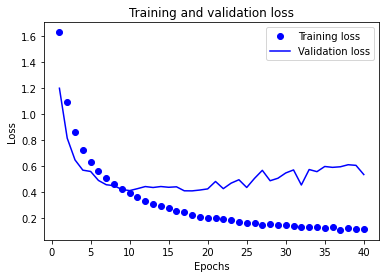

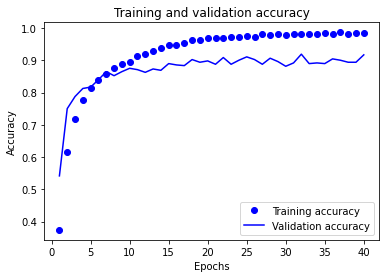

In [15]:
# Plotting the loss and accuracy
plot_loss(history)
plot_acc(history)

### Evaluating the test accuracy

In [17]:
# Evaluating the model
model.evaluate(test)

15/15 [==============================] - 0s 12ms/step - loss: 0.5978 - accuracy: 0.8917


[0.5978168249130249, 0.8916667103767395]

In [18]:
# Evaluating the best model
load_best_model = keras.models.load_model("../models/2_replicate_paper.h5")
load_best_model.evaluate(test)

11/15 [=====================>........] - ETA: 0s - loss: 0.5988 - accuracy: 0.8693

2022-08-30 23:27:01.333386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 11ms/step - loss: 0.5537 - accuracy: 0.8750


[0.5536521673202515, 0.8750000596046448]

### Conclusion

> While this model is defined and trained exactly as instructed by the authors of the paper mentioned, the trainable parameters and test accuracy are different from those mentioned in the paper.